In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/co2-emissions/_COE28282_Emissions2C_Emissions_Intensities2C_and_Emissions_Multipliers.csv


In [2]:
df = pd.read_csv("/kaggle/input/co2-emissions/_COE28282_Emissions2C_Emissions_Intensities2C_and_Emissions_Multipliers.csv")
df.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2009,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018
0,1,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",ECNC,CO2 Emissions,"Environment, Climate Change, Economic Activity...",...,0.284,0.319,0.338,0.377,0.378,0.369,0.371,0.303,0.358,0.344
1,2,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",ECNC,CO2 Emissions,"Environment, Climate Change, Economic Activity...",...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,3,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",ECNC,CO2 Emissions,"Environment, Climate Change, Economic Activity...",...,0.725,0.738,0.765,0.777,0.840,0.794,0.852,0.789,0.846,0.857
3,4,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",ECNC,CO2 Emissions,"Environment, Climate Change, Economic Activity...",...,13.804,14.110,14.616,14.120,15.358,13.728,14.273,13.838,14.121,13.067
4,5,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",ECNC,CO2 Emissions,"Environment, Climate Change, Economic Activity...",...,2.648,2.989,3.094,3.129,3.327,3.323,3.345,3.435,3.564,3.584


In [3]:
df.shape

(8910, 36)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8910 entries, 0 to 8909
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             8910 non-null   int64  
 1   Country              8910 non-null   object 
 2   ISO2                 8910 non-null   object 
 3   ISO3                 8910 non-null   object 
 4   Indicator            8910 non-null   object 
 5   Unit                 8910 non-null   object 
 6   Source               8910 non-null   object 
 7   CTS_Code             8910 non-null   object 
 8   CTS_Name             8910 non-null   object 
 9   CTS_Full_Descriptor  8910 non-null   object 
 10  Industry             8910 non-null   object 
 11  Scale                8910 non-null   object 
 12  F1995                8910 non-null   float64
 13  F1996                8910 non-null   float64
 14  F1997                8910 non-null   float64
 15  F1998                8910 non-null   f

In [5]:
df.isnull().sum()

ObjectId               0
Country                0
ISO2                   0
ISO3                   0
Indicator              0
Unit                   0
Source                 0
CTS_Code               0
CTS_Name               0
CTS_Full_Descriptor    0
Industry               0
Scale                  0
F1995                  0
F1996                  0
F1997                  0
F1998                  0
F1999                  0
F2000                  0
F2001                  0
F2002                  0
F2003                  0
F2004                  0
F2005                  0
F2006                  0
F2007                  0
F2008                  0
F2009                  0
F2010                  0
F2011                  0
F2012                  0
F2013                  0
F2014                  0
F2015                  0
F2016                  0
F2017                  0
F2018                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,ObjectId,F1995,F1996,F1997,F1998,F1999,F2000,F2001,F2002,F2003,...,F2009,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018
count,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,...,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000
mean,4455.500000,642.690767,626.247949,597.889064,634.523417,628.532695,584.815129,581.440616,545.903132,490.212486,...,277.552219,255.599049,228.419131,226.670976,219.907381,217.131214,254.947335,300.596451,256.180262,224.472003
std,2572.239783,4630.754009,4370.387146,3440.589143,3472.768617,3072.488297,2403.487481,2405.330851,2168.233614,2003.781611,...,1073.148968,967.957555,885.294193,913.127550,911.191397,800.634281,1154.516988,3413.770262,1516.822242,793.934788
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2228.250000,0.551750,0.579000,0.574250,0.583250,0.606250,0.672000,0.677000,0.702750,0.747000,...,0.831250,0.864750,0.870250,0.895000,0.906250,0.889250,0.905000,0.897750,0.962250,0.975000
50%,4455.500000,51.483010,51.680268,52.319637,54.133453,54.645225,57.685882,59.304477,56.832295,50.775041,...,31.513547,29.964705,26.775893,27.436395,26.485056,25.452176,27.371744,27.459369,26.590652,25.698487
75%,6682.750000,342.525963,339.773235,349.418155,358.978451,357.182242,362.076765,363.397858,340.890874,302.102272,...,181.621510,170.145047,149.792878,150.786022,146.083990,148.533203,167.667274,167.091640,158.101021,150.373212
max,8910.000000,268619.614800,244816.005900,180811.599800,172174.706800,131047.244200,82288.011300,84204.541120,70922.998900,63207.730870,...,29960.060010,28251.186870,29678.748310,29089.169930,32033.948990,17089.568230,53393.751770,220076.705300,85065.783690,20139.395610


<Axes: title={'center': 'Top 10 CO2 Emitting Countries Over Time'}>

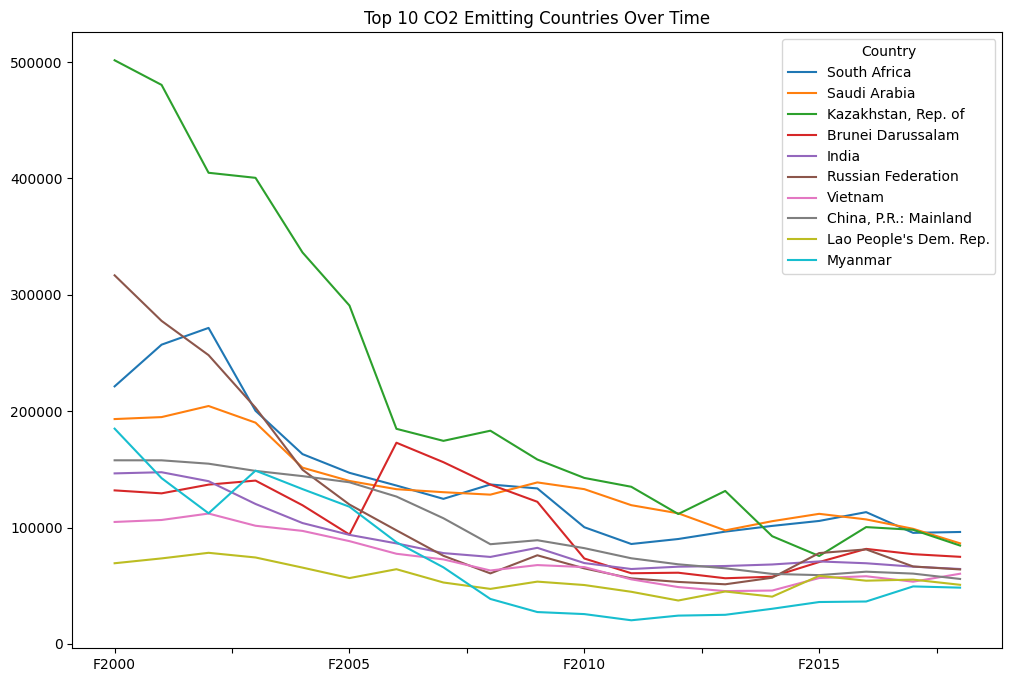

In [8]:
country_emission = df.groupby('Country')[[f"F{year}" for year in range(2000, 2019)]].sum()
country_emission = country_emission.sort_values(by='F2018', ascending=False)

top10 = country_emission.head(10)
top10.T.plot(figsize=(12,8), title="Top 10 CO2 Emitting Countries Over Time")

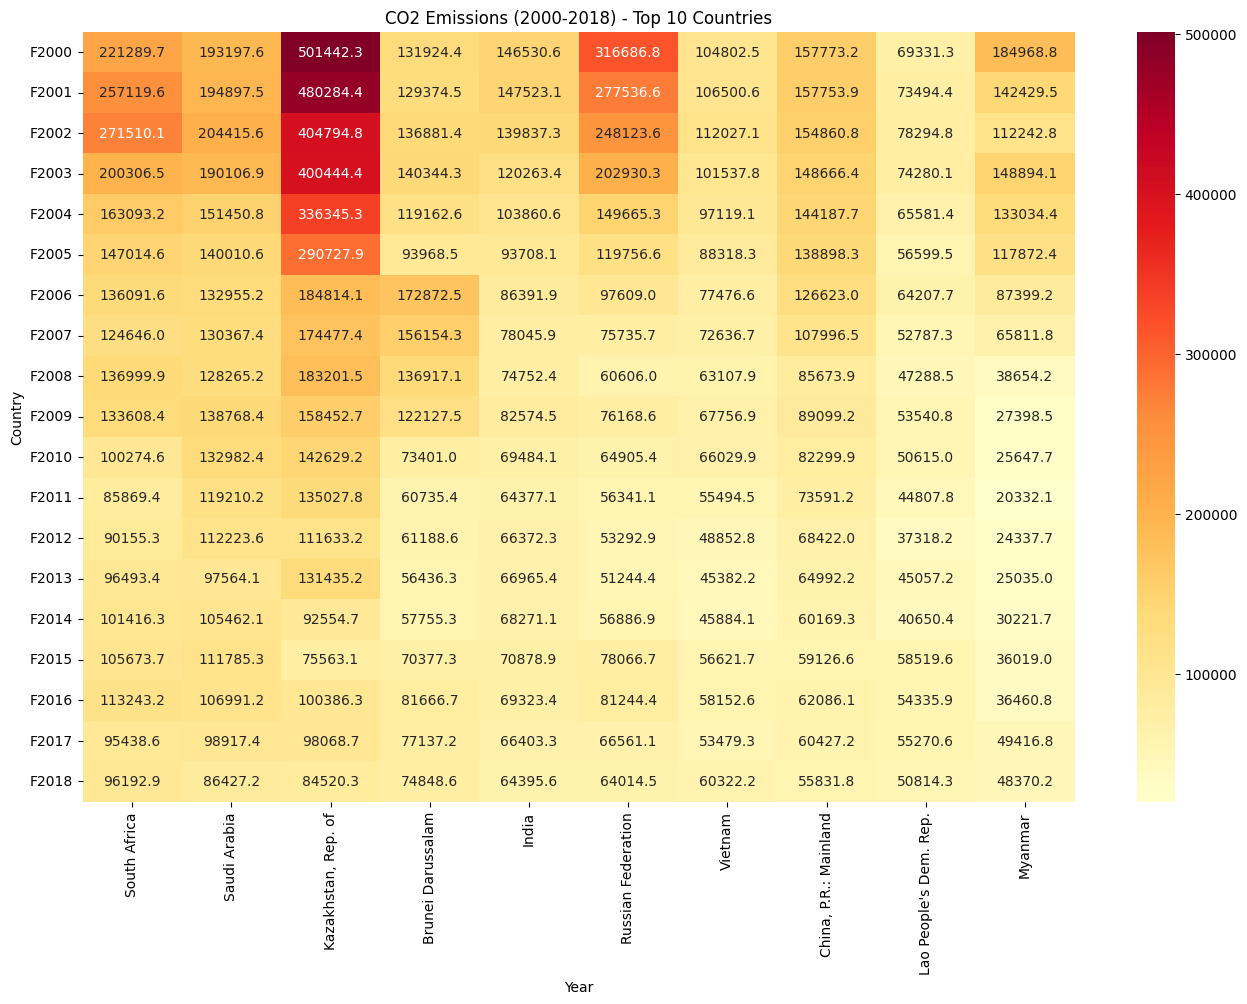

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
sns.heatmap(top10.T, cmap='YlOrRd', annot=True, fmt='.1f')
plt.title("CO2 Emissions (2000-2018) - Top 10 Countries")
plt.xlabel("Year")
plt.ylabel("Country")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_13/733330353.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10['cluster'] = clusters


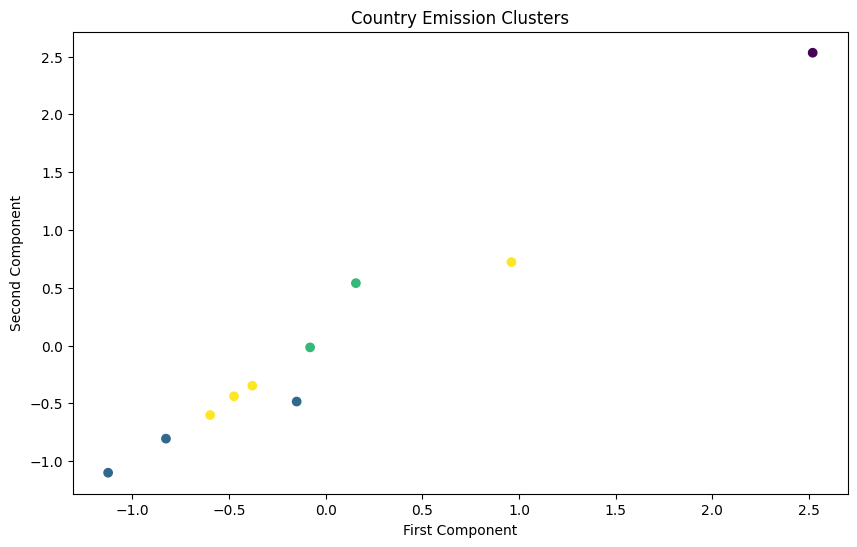

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = top10  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


top10['cluster'] = clusters

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.title("Country Emission Clusters")
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.show()


In [11]:
from sklearn.linear_model import LinearRegression

X = df[[f"F{year}" for year in range(2000, 2018)]]
y = df["F2018"]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)


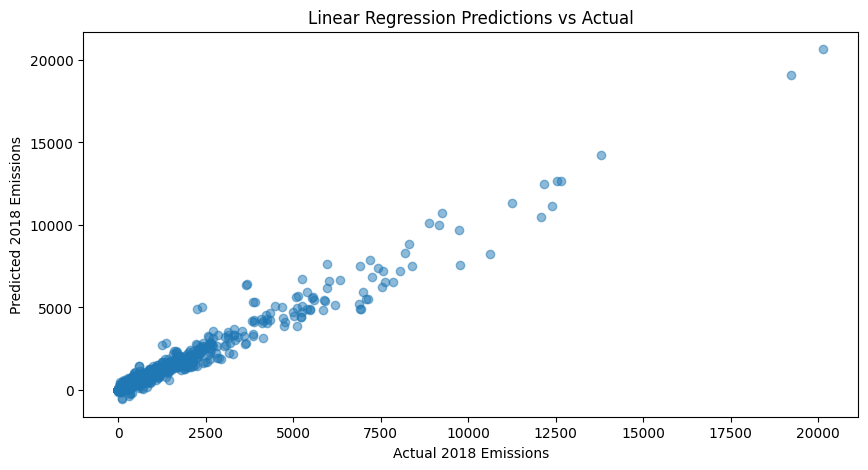

In [12]:
plt.figure(figsize=(10, 5))
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Actual 2018 Emissions")
plt.ylabel("Predicted 2018 Emissions")
plt.title("Linear Regression Predictions vs Actual")
plt.show()


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))
print("RMSE:", mean_squared_error(y, y_pred, squared=False))
print("R² Score:", r2_score(y, y_pred))


MAE: 32.96035041007318
MSE: 16995.04199558348
RMSE: 130.3650336385623
R² Score: 0.9730349442108914


In [14]:
df.to_csv("emission.csv")